In [1]:
import pandas as pd
import numpy as np

In [2]:
bond1 = pd.read_excel('中债-国开行债券总财富(1-3年)指数.xlsx',usecols=[2,6],index_col=0)['2003':]
bond5 = pd.read_excel('中债-国开行债券总财富(3-5年)指数.xlsx',usecols=[2,6],index_col=0)['2003':]
bond10 = pd.read_excel('中债-国开行债券总财富(7-10年)指数.xlsx',usecols=[2,6],index_col=0)['2003':]

In [3]:
bond1.head()

,收盘价(元)
日期,
2003-01-31,100.88
2003-02-28,101.18
2003-03-31,101.21
2003-04-30,101.67
2003-05-30,101.83


In [4]:
bonds = pd.concat([bond1, bond5, bond10],axis = 1)
bonds.columns = ['1year','5year','10year']

In [5]:
bonds.plot()

In [6]:
monthR = bonds/bonds.shift(1)-1
monthR = monthR.fillna(0)

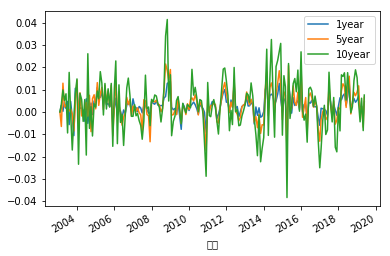

In [7]:
monthR.plot()

In [8]:
shortSignal = (monthR['10year']<monthR['1year']).shift(1)
shortSignal = shortSignal.fillna(0)
longSignal = 1-shortSignal
momentumR = longSignal*monthR['10year']+shortSignal*monthR['1year']
momentumR = pd.DataFrame(momentumR.fillna(0),columns=['momentum'])
meanWeightR = pd.DataFrame(monthR[['1year','10year']].mean(axis=1),columns = ['1&10meanWeight'])
momentumAllR = pd.concat([monthR[['1year','10year']],meanWeightR,momentumR],axis=1)
momentumAll = ((momentumAllR+1).cumprod())*100

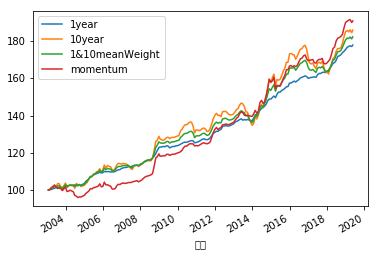

In [9]:
momentumAll.plot()

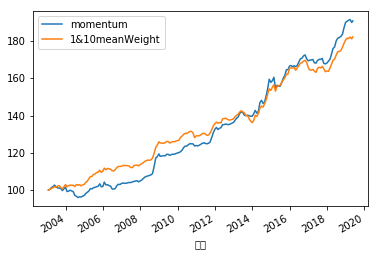

In [10]:
momentumAll[['momentum','1&10meanWeight']].plot()

In [19]:
TrueORnot = (momentumAllR['momentum']*2-momentumAllR['1year']-momentumAllR['10year'])>=0

In [20]:
pd.concat([momentumAllR[['1year','10year','momentum']],TrueORnot],axis=1)

,1year,10year,momentum,0
日期,,,,
2003-01-31,0.000000,0.000000,0.000000,True
2003-02-28,0.002974,0.003473,0.003473,True
2003-03-31,0.000297,0.009901,0.009901,True
2003-04-30,0.004545,0.005140,0.005140,True
2003-05-30,0.001574,0.008144,0.008144,True
2003-06-30,0.004714,-0.009393,-0.009393,False
2003-07-31,-0.005669,0.017732,-0.005669,False
2003-08-29,0.004718,-0.000745,-0.000745,False
2003-09-30,-0.002544,-0.017063,-0.002544,True
